In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
from sklearn import neighbors, model_selection
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
iris = datasets.load_iris()

In [4]:
data=pd.DataFrame({'sepal length':iris.data[:,0],'sepal width':iris.data[:,1],'petal length':iris.data[:,2],'petal width':iris.data[:,3],
    'species':iris.target})
x=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  

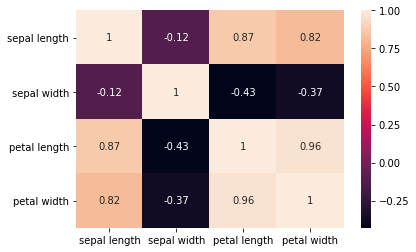

In [5]:
sns.heatmap(x.corr(), annot = True)

# KNN

In [6]:
knn=neighbors.KNeighborsClassifier()

In [7]:
x_train,x_test,y_train,y_test= model_selection.train_test_split(x,y,train_size = 0.30,random_state =0)
knnfit = knn.fit(x_train, y_train)

In [8]:
knn.score(x_test,y_test)

0.9142857142857143

In [9]:
predictions =knn.predict(x_test)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2])

In [10]:
df = pd.DataFrame(x)
prediction = knn.predict(df)
print("Prediction of data survival status: {}".format(prediction))

Prediction of data survival status: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
confusion_matrix(y_test,predictions)

array([[33,  0,  0],
       [ 0, 33,  1],
       [ 0,  8, 30]], dtype=int64)

In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.80      0.97      0.88        34
           2       0.97      0.79      0.87        38

    accuracy                           0.91       105
   macro avg       0.92      0.92      0.92       105
weighted avg       0.93      0.91      0.91       105



In [13]:
# creating list for KNN
k = list(range(1,25,2))
# creating list of cv scores
cv = []

# perform 10-fold cross validation
for i in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = model_selection.cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv.append(scores.mean())

<Figure size 432x288 with 0 Axes>

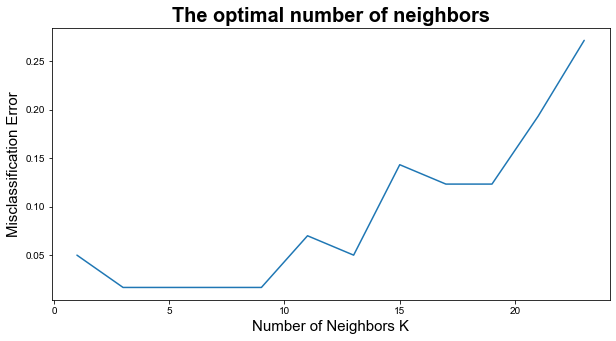

In [14]:
# changing to misclassification error
error = [1 - x for x in cv]

plt.figure()
plt.figure(figsize=(10,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k,error)

In [15]:
best_k = k[error.index(min(error))]
print("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 3


In [16]:
knn_new = neighbors.KNeighborsClassifier(n_neighbors=best_k)

In [17]:
knn_new.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
predictions_2 = knn_new.predict(x_test)

In [19]:
print("Score = {:.2f}".format(knn_new.score(x_test, y_test)))

Score = 0.94


In [20]:
print("Accuracy = {:.2f} ".format(accuracy_score(y_test, predictions_2)))

Accuracy = 0.94 


# NAIVE BAYES

In [21]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [22]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
y_pred = classifier.predict(x_test)

In [24]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion matrix : \n",cm)

Confusion matrix : 
 [[33  0  0]
 [ 0 34  0]
 [ 0  7 31]]


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [26]:
## As we can see KNN is showing higher accuracy as compared to Naive Bayes